<a href="https://colab.research.google.com/github/mikelopster/bot-trade-experiment/blob/main/Trade_content.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# อ่าน data จาก google drive
file_path = '/content/drive/MyDrive/Mikelopster/datasets/BTC-Daily.csv'
df = pd.read_csv(file_path)
print(df.head())

         unix                 date   symbol      open      high       low  \
0  1646092800  2022-03-01 00:00:00  BTC/USD  43221.71  43626.49  43185.48   
1  1646006400  2022-02-28 00:00:00  BTC/USD  37717.10  44256.08  37468.99   
2  1645920000  2022-02-27 00:00:00  BTC/USD  39146.66  39886.92  37015.74   
3  1645833600  2022-02-26 00:00:00  BTC/USD  39242.64  40330.99  38600.00   
4  1645747200  2022-02-25 00:00:00  BTC/USD  38360.93  39727.97  38027.61   

      close   Volume BTC    Volume USD  
0  43185.48    49.006289  2.116360e+06  
1  43178.98  3160.618070  1.364723e+08  
2  37712.68  1701.817043  6.418008e+07  
3  39146.66   912.724087  3.573010e+07  
4  39231.64  2202.851827  8.642149e+07  


In [ ]:
df

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD,c_date
0,1646092800,2022-03-01 00:00:00,BTC/USD,43221.71,43626.49,43185.48,43185.48,4.900629e+01,2.116360e+06,2022-03-01
1,1646006400,2022-02-28 00:00:00,BTC/USD,37717.10,44256.08,37468.99,43178.98,3.160618e+03,1.364723e+08,2022-02-28
2,1645920000,2022-02-27 00:00:00,BTC/USD,39146.66,39886.92,37015.74,37712.68,1.701817e+03,6.418008e+07,2022-02-27
3,1645833600,2022-02-26 00:00:00,BTC/USD,39242.64,40330.99,38600.00,39146.66,9.127241e+02,3.573010e+07,2022-02-26
4,1645747200,2022-02-25 00:00:00,BTC/USD,38360.93,39727.97,38027.61,39231.64,2.202852e+03,8.642149e+07,2022-02-25
...,...,...,...,...,...,...,...,...,...,...
2646,1417478400,2014-12-02 00:00:00,BTC/USD,378.39,382.86,375.23,379.25,2.593576e+06,6.832530e+03,2014-12-02
2647,1417392000,2014-12-01 00:00:00,BTC/USD,376.40,382.31,373.03,378.39,2.520662e+06,6.660560e+03,2014-12-01
2648,1417305600,2014-11-30 00:00:00,BTC/USD,376.57,381.99,373.32,373.34,1.145567e+06,3.046330e+03,2014-11-30
2649,1417219200,2014-11-29 00:00:00,BTC/USD,376.42,386.60,372.25,376.72,2.746157e+06,7.245190e+03,2014-11-29


In [ ]:
df['c_date'] = pd.to_datetime(df['date'])
df_2020 = df[df['c_date'].dt.year == 2020]
df_2021 = df[df['c_date'].dt.year == 2021]

In [ ]:
df_2021

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD,c_date
60,1640908800,2021-12-31 00:00:00,BTC/USD,47110.30,48589.47,45655.31,46214.37,1798.552604,8.311898e+07,2021-12-31
61,1640822400,2021-12-30 00:00:00,BTC/USD,46474.59,47916.32,45934.37,47150.71,2162.270443,1.019526e+08,2021-12-30
62,1640736000,2021-12-29 00:00:00,BTC/USD,47597.70,48157.41,46099.94,46483.36,2089.308158,9.711806e+07,2021-12-29
63,1640649600,2021-12-28 00:00:00,BTC/USD,50708.05,50719.59,47300.00,47543.30,2215.268634,1.053212e+08,2021-12-28
64,1640563200,2021-12-27 00:00:00,BTC/USD,50885.32,52098.60,50479.44,50718.11,1102.983437,5.594124e+07,2021-12-27
...,...,...,...,...,...,...,...,...,...,...
420,1609804800,2021-01-05 00:00:00,BTC/USD,32054.23,34500.00,29936.26,34039.05,14806.496507,5.039991e+08,2021-01-05
421,1609718400,2021-01-04 00:00:00,BTC/USD,33068.83,33669.76,27734.00,32005.88,22446.940005,7.184341e+08,2021-01-04
422,1609632000,2021-01-03 00:00:00,BTC/USD,32216.51,34800.00,31977.45,33097.83,14160.581280,4.686845e+08,2021-01-03
423,1609545600,2021-01-02 00:00:00,BTC/USD,29410.77,33333.00,29050.00,32216.53,17867.878898,5.756411e+08,2021-01-02


In [ ]:
!pip install mibian

  Preparing metadata (setup.py) ... done
  Created wheel for mibian: filename=mibian-0.1.3-py3-none-any.whl size=4026 sha256=4a5b3d00b985442a30048d28354369e5d072d47255e454766769f16bc3ffed14
  Stored in directory: /root/.cache/pip/wheels/2c/4f/a7/be034e17cc306b0850f5f1a5b4541281b49475c58620a7ff40
Successfully built mibian


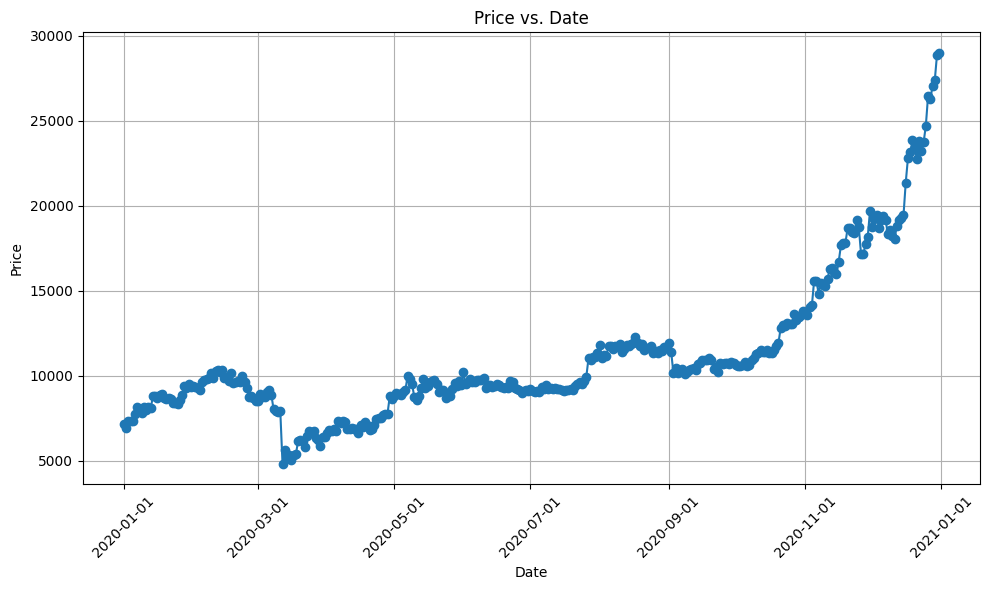

In [ ]:
# setup matplotlib
plt.figure(figsize=(10, 6))  # Set the figure size (width, height) in inches
plt.plot(df_2020['c_date'], df_2020['close'], marker='o', linestyle='-')

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price vs. Date')
plt.grid(True)

# Show the x-axis date labels in a readable format
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

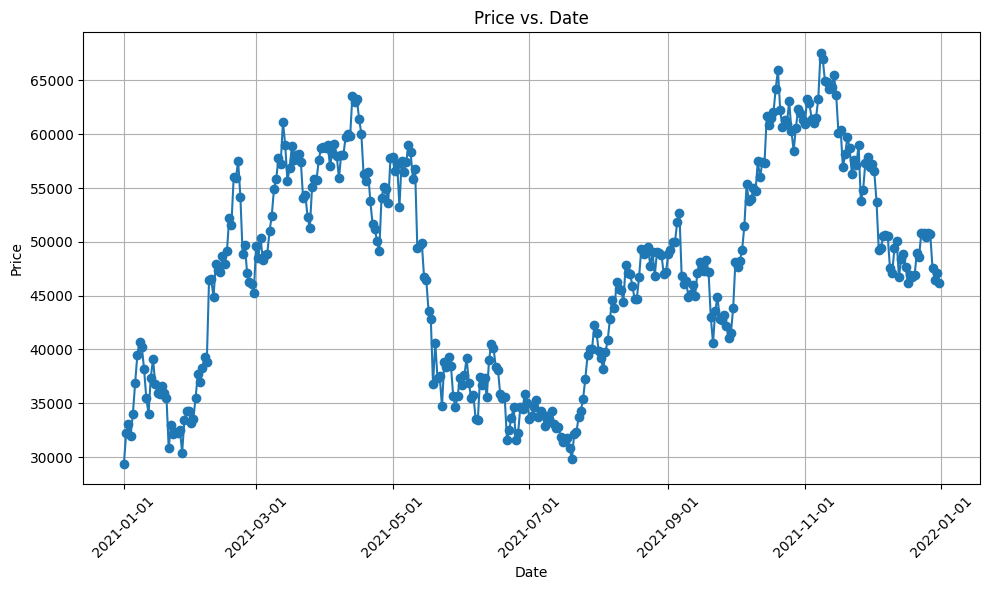

In [ ]:
# setup matplotlib
plt.figure(figsize=(10, 6))  # Set the figure size (width, height) in inches
plt.plot(df_2021['c_date'], df_2021['close'], marker='o', linestyle='-')

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price vs. Date')
plt.grid(True)

# Show the x-axis date labels in a readable format
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

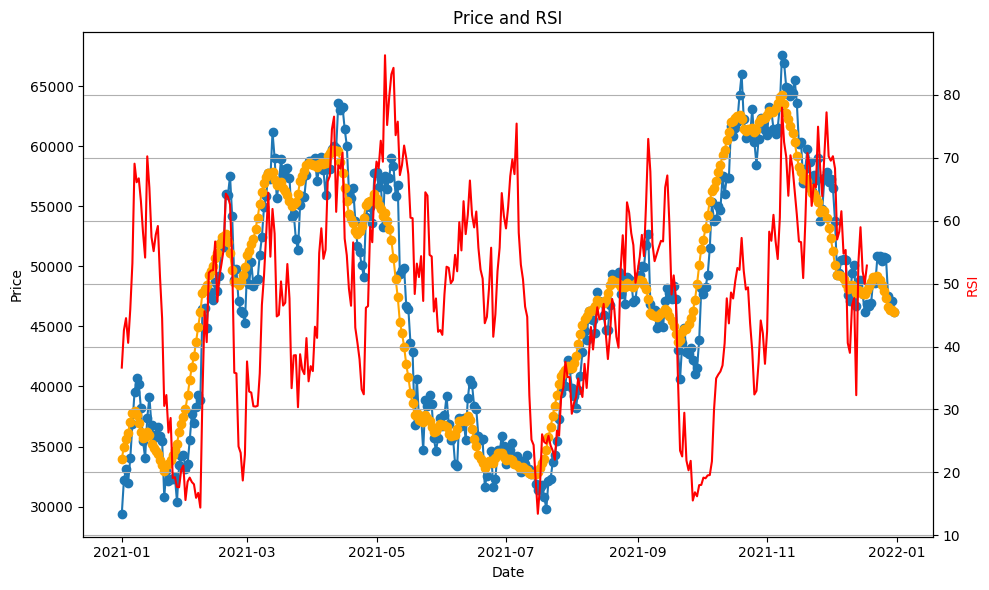

In [ ]:
# 1 ใช้ Technical analysis
# Calculate Exponential Moving Average (EMA)
def calculate_ema(data, period):
    return data['close'].ewm(span=period, adjust=False).mean()

# Calculate Relative Strength Index (RSI)
def calculate_rsi(data, period=14):
    delta = data['close'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi


df_ema = calculate_ema(df_2021, 10)
df_rsa = calculate_rsi(df_2021)

# Plot RSI
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the actual 'price' column on the y-axis against the 'date' column on the x-axis
ax1.plot(df_2021['c_date'], df_2021['close'], label='Actual Price', marker='o', linestyle='-')

# Plot EMA
ax1.plot(df_2021['c_date'], df_ema, label='EMA 10', marker='o', linestyle='-', color='orange')

# Customize the plot
ax1.set_xlabel('Date')
ax1.set_ylabel('Price')

# Plot RSI
ax2 = ax1.twinx()  # Create a twin axes sharing the same x-axis
ax2.plot(df_2021['c_date'], df_rsa, color='red', label='RSI')
ax2.set_ylabel('RSI', color='red')

# Set labels, title, and grid
ax1.set_title('Price and RSI')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Bot action for 1.
# ถ้า RSA น้อยกว่า 20 และ กราฟต่ำกว่า EMA = ซื้อ (จะซื้อเรื่อยๆจนหมด)
# ถ้า RSA มากกว่า 60 และ กราฟอยู่สูงกว่า EMA = ขาย (จะขายเรื่อยๆจนหมด)

inventories = []
profit = 0
trade_count = 0
last_price = -1

for i in range(len(df_2021) - 1, 0, -1):
  close_price = df_2021.iloc[i]['close']
  ema_price = df_ema.iloc[i]
  last_price = close_price
  if df_rsa.iloc[i] <= 20 and close_price <= ema_price:
    inventories.append(close_price)
  elif len(inventories) > 0 and df_rsa.iloc[i] >= 60 and close_price >= ema_price:
    selected_price = inventories.pop(0)
    profit += (close_price - selected_price)
    # print('sell date = ', df_2020.iloc[i]['date'], 'close at', selected_price, close_price)
    trade_count += 1

print('จำนวน Bitcoin ที่เหลือวันสุดท้าย', len(inventories))

print('กำไร = ', profit, ', จำนวนการ Trade = ', trade_count)

while len(inventories) > 0:
  selected_price = inventories.pop(0)
  profit += (last_price - selected_price)
  trade_count += 1



จำนวน Bitcoin ที่เหลือวันสุดท้าย 0
กำไร =  528553.14 , จำนวนการ Trade =  25


In [ ]:
!pip install mibian

  Preparing metadata (setup.py) ... done
  Created wheel for mibian: filename=mibian-0.1.3-py3-none-any.whl size=4026 sha256=3b8267b92b6016d1acf508ddd8be40a6aa0a6bf82142362c03341115aa53600c
  Stored in directory: /root/.cache/pip/wheels/2c/4f/a7/be034e17cc306b0850f5f1a5b4541281b49475c58620a7ff40
Successfully built mibian


volatility 0.04262292044517514


<ipython-input-36-b039eac25e9a>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021['Call_Option_Price'] = 0
<ipython-input-36-b039eac25e9a>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021['Put_Option_Price'] = 0


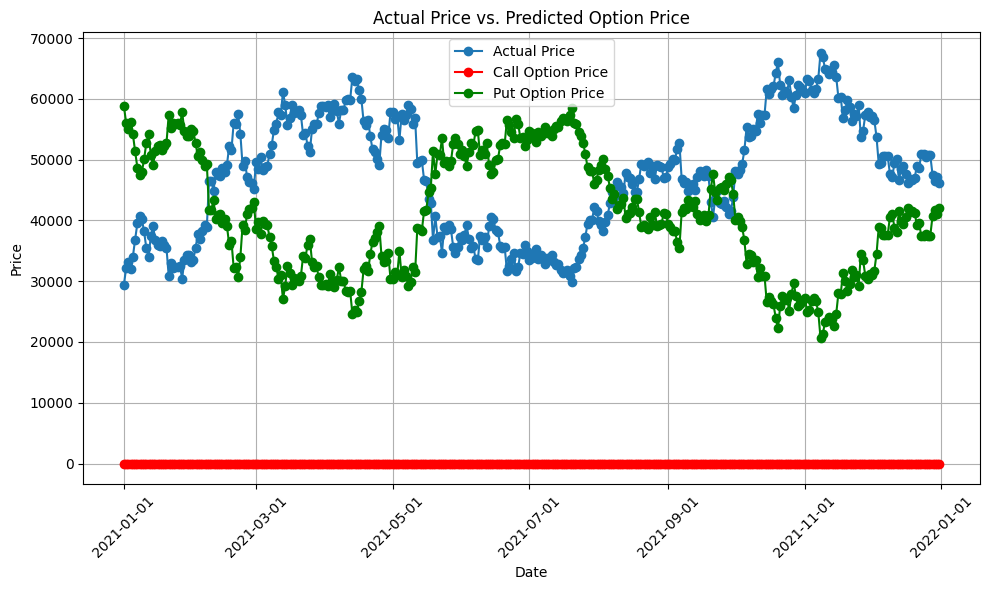

In [ ]:
# 2 ใช้ Black Schole model - Probability model

from mibian import BS

# Function to calculate the fair price of a call option using Black-Scholes model
def calculate_option_price(current_price, strike_price, time_to_expiry, risk_free_rate, volatility):
    option = BS([current_price, strike_price, risk_free_rate, time_to_expiry], volatility=volatility)
    return option.callPrice, option.putPrice

# Function to calculate annualized volatility
def calculate_volatility(prices):
    returns = prices.pct_change()
    volatility = returns.std()
    return volatility

# Calculate annualized volatility
volatility = calculate_volatility(df_2021['close'])
print("volatility", volatility)


def calculate_ema(data, period):
    return data['close'].ewm(span=period, adjust=False).mean()

df_ema = calculate_ema(df_2021, 50)

# Black-Scholes parameters
spot_price = df_2021['close'].iloc[-1]  # Use the last price as the spot price
strike_price = spot_price * 3
risk_free_rate = 0.05  # Set the risk-free rate based on market conditions
time_to_expiry = 1 / 365  # Assuming a one-year option

# Add new columns to the DataFrame to store call and put option prices
df_2021['Call_Option_Price'] = 0
df_2021['Put_Option_Price'] = 0

i = 0
# Loop through the DataFrame and calculate option prices for each date
for index, row in df_2021.iterrows():
    current_price = row['close']
    call_option_price, put_option_price = calculate_option_price(current_price, strike_price, time_to_expiry, risk_free_rate, volatility)

    df_2021.at[index, 'call_option_price'] = call_option_price
    df_2021.at[index, 'put_option_price'] = put_option_price
    i += 1

plt.figure(figsize=(10, 6))  # Set the figure size (width, height) in inches

# Plot the actual 'price' column on the y-axis against the 'date' column on the x-axis
plt.plot(df_2021['c_date'], df_2021['close'], label='Actual Price', marker='o', linestyle='-')

# Plot BS theorical price model
plt.plot(df_2021['c_date'], df_2021['call_option_price'], label='Call Option Price', marker='o', linestyle='-', color='red')
plt.plot(df_2021['c_date'], df_2021['put_option_price'], label='Put Option Price', marker='o', linestyle='-', color='green')

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual Price vs. Predicted Option Price')
plt.legend()

# Show the x-axis date labels in a readable format
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Bot for action 2
# ตามหลักเราควรใช้ Call action ในการหาราคาเข้าซื้อ
# แต่เนื่องจากเราตีกราฟ Call action ออกมาไม่ได้ (ซึ่งไม่แน่ใจว่าทำไมเหมือนกัน)
# ใช้ Put action แล้วกลับสัญญาณแทน โดย ถ้า
# - ราคาน้อยกว่า Put action = ซื้อ
# - ราคามากกว่า Put action = ขาย

print(len(df_2021))

inventories = []

profit = 0
trade_count = 0
last_price = -1

for i in range(len(df_2021) - 1, 0, -1):
  close_price = df_2021.iloc[i]['close']
  last_price = close_price
  theorical_price = df_2021.iloc[i]['put_option_price']
  if close_price < theorical_price:
    inventories.append(close_price)
  elif len(inventories) > 0 and close_price > theorical_price:
    select_price = inventories.pop(0)
    profit += close_price - select_price
    trade_count += 1

print('จำนวน Bitcoin ที่เหลือตอนสุดท้าย', len(inventories))

while len(inventories) > 0:
  select_price = inventories.pop(0)
  profit += last_price - select_price
  trade_count += 1

print('กำไร =', profit, 'จำนวนการ Trade =', trade_count)

365
จำนวน Bitcoin ที่เหลือตอนสุดท้าย 0
กำไร = 2205825.16 จำนวนการ Trade = 131


In [ ]:
df_2021_test = pd.concat([df_2021, df_2020[0:5]])
df_2021_test['close']

60     46214.37
61     47150.71
62     46483.36
63     47543.30
64     50718.11
         ...   
425    28992.79
426    28881.30
427    27370.00
428    27037.91
429    26259.60
Name: close, Length: 370, dtype: float64

In [ ]:
!pip install tensorboard
!pip install pyngrok

%load_ext tensorboard


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 681.2/681.2 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-6.0.0-py3-none-any.whl size=19867 sha256=ee7467ebd68612a3278d3feb09925b7baf3f894c6c3ecbe5f9cec6812538a71e
  Stored in directory: /root/.cache/pip/wheels/5c/42/78/0c3d438d7f5730451a25f7ac6cbf4391759d22a67576ed7c2c
Successfully built pyngrok


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the log directory for TensorBoard
log_dir = "logs/"

# Create a TensorBoard callback
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


<ipython-input-19-84f3d69bb5d2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['close_normalized'] = scaler.fit_transform(df_2020[['close']])


Epoch 1/10
361/361 [==============================] - 4s 4ms/step - loss: 0.0039
Epoch 2/10
361/361 [==============================] - 1s 4ms/step - loss: 8.3005e-04
Epoch 3/10
361/361 [==============================] - 1s 4ms/step - loss: 7.9932e-04
Epoch 4/10
361/361 [==============================] - 2s 5ms/step - loss: 8.8343e-04
Epoch 5/10
361/361 [==============================] - 2s 5ms/step - loss: 6.3494e-04
Epoch 6/10
361/361 [==============================] - 1s 4ms/step - loss: 7.2400e-04
Epoch 7/10
361/361 [==============================] - 1s 3ms/step - loss: 6.8960e-04
Epoch 8/10
361/361 [==============================] - 1s 3ms/step - loss: 6.4380e-04
Epoch 9/10
361/361 [==============================] - 1s 3ms/step - loss: 6.7863e-04
Epoch 10/10
12/12 [==============================] - 1s 3ms/step


<ipython-input-19-84f3d69bb5d2>:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021['predicted_prices_lstm'] = predicted_prices


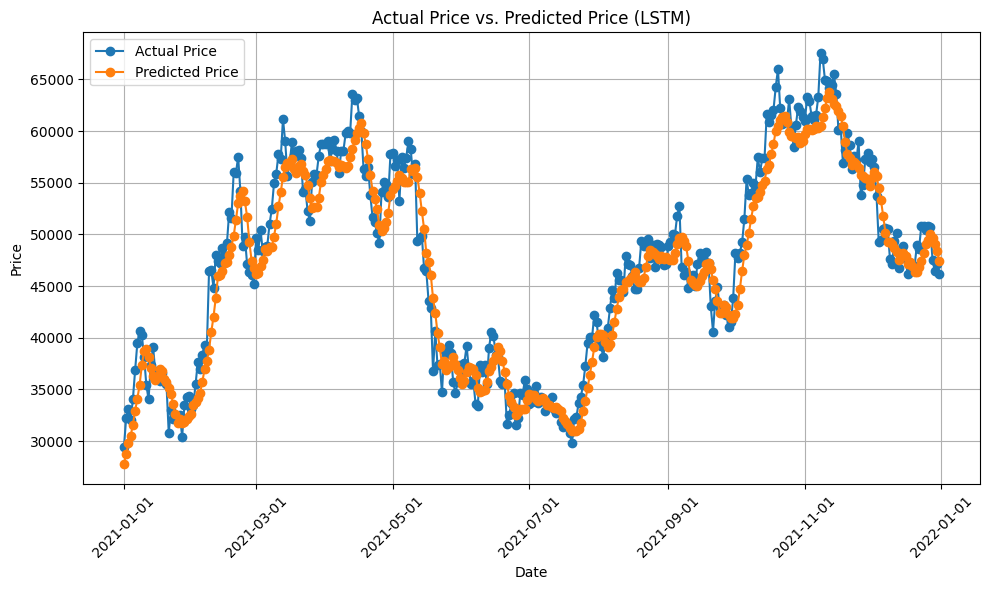

In [ ]:
#3 Deep learning (Machine learning)

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Preprocess the data
scaler = MinMaxScaler()

df_2020['close_normalized'] = scaler.fit_transform(df_2020[['close']])

df_2021_test = pd.concat([df_2021, df_2020[0:5]])
df_2021_test['close_normalized'] = scaler.fit_transform(df_2021_test[['close']])

# Function to create sequences and labels for LSTM
def create_sequences(data, sequence_length):
    sequences = []
    labels = []

    for i in range(len(data) - sequence_length):
      if i + sequence_length >= len(data):
        print('! count')
        break

      sequences.append(data[i:i+sequence_length])
      labels.append(data[i+sequence_length])

    return np.array(sequences), np.array(labels)

# LSTM parameters
sequence_length = 5  # Adjust this parameter to define the length of the input sequences
num_features = 1  # We are using only the 'price' column, so the number of features is 1
batch_size = 1
epochs = 10

# Create sequences and labels
train_sequences, train_labels = create_sequences(df_2020['close_normalized'].values, sequence_length)

# Build LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(sequence_length, num_features)))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
model.fit(train_sequences, train_labels, batch_size=batch_size, epochs=epochs, verbose=1, callbacks=[tensorboard_callback])

# Predict ปี 2021
test_sequences, test_labels = create_sequences(df_2021_test['close_normalized'].values, sequence_length)

# Use the model to predict Bitcoin prices
predicted_prices_normalized = model.predict(test_sequences)
predicted_prices = scaler.inverse_transform(predicted_prices_normalized)

df_2021['predicted_prices_lstm'] = predicted_prices

# Plotting the data
plt.figure(figsize=(10, 6))  # Set the figure size (width, height) in inches

# Plot the actual 'price' column on the y-axis against the 'date' column on the x-axis
plt.plot(df_2021['c_date'], df_2021['close'], label='Actual Price', marker='o', linestyle='-')

# Plot the predicted prices on the y-axis against the 'date' column on the x-axis
plt.plot(df_2021['c_date'], df_2021['predicted_prices_lstm'], label='Predicted Price', marker='o', linestyle='-')

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual Price vs. Predicted Price (LSTM)')
plt.legend()

# Show the x-axis date labels in a readable format
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# bot for action 3
# ซื้อเมื่อ ราคา prediect > EMA 10 และ RSI > 60
# ขายเมื่อ ราคา prediect < EMA 10 และ RSI < 20

# Calculate Exponential Moving Average (EMA)
def calculate_ema(data, period):
    return data['predicted_prices_lstm'].ewm(span=period, adjust=False).mean()

# Calculate Relative Strength Index (RSI)
def calculate_rsi(data, period=14):
    delta = data['predicted_prices_lstm'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

profit = 0
inventories = []
trade_count = 0

df_ema_lstm = calculate_ema(df_2021, 10)
df_rsi_lstm = calculate_rsi(df_2021)

inventories = []
profit = 0
trade_count = 0
last_price = -1

for i in range(len(df_2021) - 1, 0, -1):
  close_price = df_2021.iloc[i]['close']
  predict_price = df_2021.iloc[i]['predicted_prices_lstm']
  ema_price = df_ema_lstm.iloc[i]
  last_price = close_price

  if df_rsi_lstm.iloc[i] <= 20 and predict_price <= ema_price:
    inventories.append(close_price)
  elif len(inventories) > 0 and df_rsi_lstm.iloc[i] >= 60 and predict_price >= ema_price:
    selected_price = inventories.pop(0)
    profit += (close_price - selected_price)
    # print('sell date = ', df_2020.iloc[i]['date'], 'close at', selected_price, close_price)
    trade_count += 1

print('จำนวน Bitcoin ที่เหลือตอนสุดท้าย', len(inventories))
print('ราคาซื้อที่เหลืออยู่:', inventories)
print('ราคา ณ วันสุดท้าย:', close_price)

while len(inventories) > 0:
  selected_price = inventories.pop(0)
  profit += (last_price - selected_price)
  trade_count += 1

print('กำไร =', profit, ',จำนวนการ Trade = ', trade_count)


จำนวน Bitcoin ที่เหลือตอนสุดท้าย 2
ราคาซื้อที่เหลืออยู่: [62301.59, 61932.3]
ราคา ณ วันสุดท้าย: 47150.71
กำไร = 746805.7599999998 ,จำนวนการ Trade =  88


In [ ]:
#4 Deep Reinforcement learning

import math
import random

import matplotlib.pyplot as plt
import pandas_datareader as data_reader
import tensorflow as tf

from tqdm import tqdm_notebook, tqdm
from collections import deque

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
class AI_Trader():

  def __init__(self, state_size, action_space=3, model_name="AITrader"):
    self.state_size = state_size
    self.action_space = action_space
    self.memory = deque(maxlen=2000)
    self.inventory = []
    self.model_name = model_name
    self.model = self.model_builder()

    self.gamma = 0.95
    self.epsilon = 1.0
    self.epsilon_final = 0.01
    self.epsilon_decay = 0.995

  def model_builder(self):
    model = Sequential()
    model.add(Dense(units=32, activation='relu', input_dim=self.state_size))
    model.add(Dense(units=64, activation='relu'))
    model.add(Dense(units=128, activation='relu'))
    model.add(Dense(units=self.action_space, activation='linear'))
    model.compile(loss='mse', optimizer=Adam(learning_rate=0.001))
    return model

  def trade(self, state):
    if random.random() <= self.epsilon:
      return random.randrange(self.action_space)

    return np.argmax(self.model.predict(state)[0])

  def batch_train(self, batch_size):
    batch = []
    for i in range(len(self.memory) - batch_size + 1, len(self.memory)):
      batch.append(self.memory[i])

    for state, action, reward, next_state, done in batch:
      reward = reward
      if not done:
        reward = reward + self.gamma * np.amax(self.model.predict(next_state)[0])

      target = self.model.predict(state)
      target[0][action] = reward

      self.model.fit(state, target, epochs=1, verbose=0)

    if self.epsilon > self.epsilon_final:
      self.epsilon *= self.epsilon_decay
      print('current epsilon = ', self.epsilon)



In [ ]:
data = list(df_2021['close'])[::-1]
data_samples = len(data) - 1

window_size = 10
episodes = 5

batch_size = 32

trader = AI_Trader(window_size)
trader.model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                352       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 3)                 387       
                                                                 
Total params: 11,171
Trainable params: 11,171
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def sigmoid(x):
    if x > 500:
      return 1
    elif x < -500:
      return 0
    return 1 / (1 + math.exp(-x))

def state_creator(data, timestep, window_size):
  starting_id = timestep - window_size + 1

  if starting_id >= 0:
    windowed_data = data[starting_id:timestep+1]
  else:
    windowed_data = (-1*starting_id) * [data[0]] + list(data[0:timestep+1])

  state = []

  for i in range(window_size -1):
    state.append(sigmoid(windowed_data[i+1] - windowed_data[i]))

  return np.array([state])

# Train จากปี 2020
for episode in range(1, episodes + 1):

  print("Episode: {}/{}".format(episode, episodes))

  state = state_creator(data, 0, window_size + 1)

  total_profit = 0
  trader.inventory = []

  for t in tqdm(range(data_samples)):

    action = trader.trade(state)

    next_state = state_creator(data, t+1, window_size + 1)
    reward = 0

    if action == 1: #Buying
      trader.inventory.append(data[t])
      print("AI Trader bought: ", data[t])

    elif action == 2 and len(trader.inventory) > 0: #Selling
      buy_price = trader.inventory.pop(0)

      reward = max(data[t] - buy_price, 0)
      total_profit += data[t] - buy_price
      print("AI Trader sold: ", data[t], " Profit: " + str(data[t] - buy_price))

    if t == data_samples - 1:
      done = True
    else:
      done = False

    trader.memory.append((state, action, reward, next_state, done))

    state = next_state

    if done:
      print('=== Total profit = ', total_profit)

    if len(trader.memory) > batch_size:
      trader.batch_train(batch_size)

Episode: 1/5


  0%|          | 0/364 [00:00<?, ?it/s]

1/1 [==============================] - 0s 24ms/step


  0%|          | 1/364 [00:07<45:44,  7.56s/it]

current epsilon =  0.23965031961336
1/1 [==============================] - 0s 26ms/step


  1%|          | 2/364 [00:16<49:42,  8.24s/it]

current epsilon =  0.2384520680152932
1/1 [==============================] - 0s 41ms/step


  1%|          | 3/364 [00:24<50:25,  8.38s/it]

current epsilon =  0.23725980767521673
1/1 [==============================] - 0s 37ms/step


  1%|          | 4/364 [00:32<49:23,  8.23s/it]

current epsilon =  0.23607350863684065
1/1 [==============================] - 0s 26ms/step


  1%|▏         | 5/364 [00:41<50:16,  8.40s/it]

current epsilon =  0.23489314109365644
1/1 [==============================] - 0s 26ms/step


  2%|▏         | 6/364 [00:49<48:15,  8.09s/it]

current epsilon =  0.23371867538818816
1/1 [==============================] - 0s 35ms/step


  2%|▏         | 7/364 [00:58<51:02,  8.58s/it]

current epsilon =  0.23255008201124722
1/1 [==============================] - 0s 25ms/step


  2%|▏         | 8/364 [01:08<53:46,  9.06s/it]

current epsilon =  0.231387331601191
1/1 [==============================] - 0s 28ms/step


  2%|▏         | 9/364 [01:16<50:54,  8.60s/it]

current epsilon =  0.23023039494318503
1/1 [==============================] - 0s 26ms/step
AI Trader bought:  38173.73
1/1 [==============================] - 0s 23ms/step


  3%|▎         | 10/364 [01:25<51:25,  8.72s/it]

current epsilon =  0.2290792429684691
1/1 [==============================] - 0s 24ms/step
AI Trader bought:  35455.58
1/1 [==============================] - 0s 39ms/step


  3%|▎         | 11/364 [01:34<51:43,  8.79s/it]

current epsilon =  0.22793384675362674
1/1 [==============================] - 0s 36ms/step
AI Trader bought:  34035.02
1/1 [==============================] - 0s 24ms/step


  3%|▎         | 12/364 [01:42<49:50,  8.49s/it]

current epsilon =  0.22679417751985861
1/1 [==============================] - 0s 29ms/step
AI Trader bought:  37393.49
1/1 [==============================] - 0s 29ms/step


  4%|▎         | 13/364 [01:51<50:41,  8.67s/it]

current epsilon =  0.22566020663225933
1/1 [==============================] - 0s 32ms/step
AI Trader bought:  39134.35
1/1 [==============================] - 0s 30ms/step


  4%|▍         | 14/364 [01:58<48:53,  8.38s/it]

current epsilon =  0.22453190559909803
1/1 [==============================] - 0s 26ms/step
AI Trader bought:  36756.57
1/1 [==============================] - 0s 28ms/step


  4%|▍         | 15/364 [02:07<49:29,  8.51s/it]

current epsilon =  0.22340924607110255
1/1 [==============================] - 0s 42ms/step


  4%|▍         | 16/364 [02:15<48:43,  8.40s/it]

current epsilon =  0.22229219984074702
1/1 [==============================] - 0s 36ms/step


  5%|▍         | 17/364 [02:25<50:21,  8.71s/it]

current epsilon =  0.2211807388415433
1/1 [==============================] - 0s 39ms/step
AI Trader bought:  36616.95
1/1 [==============================] - 0s 27ms/step


  5%|▍         | 18/364 [02:35<52:25,  9.09s/it]

current epsilon =  0.22007483514733558
1/1 [==============================] - 0s 36ms/step
AI Trader bought:  35917.62
1/1 [==============================] - 0s 39ms/step


  5%|▌         | 19/364 [02:45<53:39,  9.33s/it]

current epsilon =  0.2189744609715989
1/1 [==============================] - 0s 35ms/step
AI Trader bought:  35496.91
1/1 [==============================] - 0s 25ms/step


  5%|▌         | 20/364 [02:52<50:52,  8.87s/it]

current epsilon =  0.2178795886667409
1/1 [==============================] - 0s 24ms/step
AI Trader bought:  30818.18
1/1 [==============================] - 0s 24ms/step


  6%|▌         | 21/364 [03:01<50:56,  8.91s/it]

current epsilon =  0.2167901907234072
1/1 [==============================] - 0s 26ms/step
AI Trader bought:  32992.06
1/1 [==============================] - 0s 42ms/step


  6%|▌         | 22/364 [03:09<49:07,  8.62s/it]

current epsilon =  0.21570623976979014
1/1 [==============================] - 0s 53ms/step
AI Trader bought:  32117.49
1/1 [==============================] - 0s 26ms/step


  6%|▋         | 23/364 [03:18<49:19,  8.68s/it]

current epsilon =  0.21462770857094118
AI Trader bought:  32288.83
1/1 [==============================] - 0s 41ms/step


  7%|▋         | 24/364 [03:27<49:53,  8.80s/it]

current epsilon =  0.21355457002808648
1/1 [==============================] - 0s 23ms/step
AI Trader sold:  32261.22  Profit: -5912.510000000002
1/1 [==============================] - 0s 23ms/step


  7%|▋         | 25/364 [03:35<47:54,  8.48s/it]

current epsilon =  0.21248679717794605
1/1 [==============================] - 0s 36ms/step
AI Trader sold:  32504.53  Profit: -2951.050000000003
1/1 [==============================] - 0s 24ms/step


  7%|▋         | 26/364 [03:44<48:38,  8.63s/it]

current epsilon =  0.21142436319205632
1/1 [==============================] - 0s 29ms/step
AI Trader sold:  30424.62  Profit: -3610.399999999998
1/1 [==============================] - 0s 40ms/step


  7%|▋         | 27/364 [03:55<53:00,  9.44s/it]

current epsilon =  0.21036724137609603
1/1 [==============================] - 0s 54ms/step
AI Trader sold:  33484.87  Profit: -3908.6199999999953
1/1 [==============================] - 0s 26ms/step


  8%|▊         | 28/364 [04:04<51:12,  9.14s/it]

current epsilon =  0.20931540516921554
1/1 [==============================] - 0s 24ms/step


  8%|▊         | 29/364 [04:13<51:05,  9.15s/it]

current epsilon =  0.20826882814336947
1/1 [==============================] - 0s 34ms/step


  8%|▊         | 30/364 [04:22<50:08,  9.01s/it]

current epsilon =  0.20722748400265262
1/1 [==============================] - 0s 22ms/step


  9%|▊         | 31/364 [04:30<48:47,  8.79s/it]

current epsilon =  0.20619134658263935
1/1 [==============================] - 0s 21ms/step


  9%|▉         | 32/364 [04:39<48:57,  8.85s/it]

current epsilon =  0.20516038984972615
AI Trader bought:  35522.16
1/1 [==============================] - 0s 26ms/step


  9%|▉         | 33/364 [04:46<46:48,  8.48s/it]

current epsilon =  0.2041345879004775
1/1 [==============================] - 0s 24ms/step


  9%|▉         | 34/364 [04:56<47:35,  8.65s/it]

current epsilon =  0.2031139149609751
1/1 [==============================] - 0s 55ms/step


 10%|▉         | 35/364 [05:04<47:44,  8.71s/it]

current epsilon =  0.20209834538617025
1/1 [==============================] - 0s 35ms/step
AI Trader sold:  38320.0  Profit: -814.3499999999985
1/1 [==============================] - 0s 37ms/step


 10%|▉         | 36/364 [05:14<48:28,  8.87s/it]

current epsilon =  0.2010878536592394
1/1 [==============================] - 0s 43ms/step
AI Trader sold:  39282.1  Profit: 2525.529999999999
1/1 [==============================] - 0s 29ms/step


 10%|█         | 37/364 [05:24<51:29,  9.45s/it]

current epsilon =  0.2000824143909432
1/1 [==============================] - 0s 25ms/step
AI Trader sold:  38858.39  Profit: 2241.4400000000023
1/1 [==============================] - 0s 24ms/step


 10%|█         | 38/364 [05:33<50:43,  9.34s/it]

current epsilon =  0.19908200231898848
1/1 [==============================] - 0s 23ms/step
AI Trader sold:  46416.45  Profit: 10498.829999999994
1/1 [==============================] - 0s 26ms/step


 11%|█         | 39/364 [05:41<48:01,  8.87s/it]

current epsilon =  0.19808659230739353
1/1 [==============================] - 0s 27ms/step
AI Trader sold:  46505.2  Profit: 11008.289999999994
1/1 [==============================] - 0s 26ms/step


 11%|█         | 40/364 [05:50<48:07,  8.91s/it]

current epsilon =  0.19709615934585656
1/1 [==============================] - 0s 27ms/step
AI Trader sold:  44854.63  Profit: 14036.449999999997
1/1 [==============================] - 0s 36ms/step


 11%|█▏        | 41/364 [05:58<46:17,  8.60s/it]

current epsilon =  0.19611067854912728
1/1 [==============================] - 0s 35ms/step
AI Trader sold:  47981.48  Profit: 14989.420000000006
1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 42/364 [06:07<46:05,  8.59s/it]

current epsilon =  0.19513012515638165
1/1 [==============================] - 0s 23ms/step
AI Trader sold:  47395.84  Profit: 15278.349999999995
1/1 [==============================] - 0s 35ms/step


 12%|█▏        | 43/364 [06:15<46:18,  8.66s/it]

current epsilon =  0.19415447453059972
1/1 [==============================] - 0s 25ms/step
AI Trader sold:  47228.48  Profit: 14939.650000000001
1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 44/364 [06:23<44:41,  8.38s/it]

current epsilon =  0.19318370215794672
1/1 [==============================] - 0s 24ms/step
AI Trader sold:  48662.5  Profit: 13140.339999999997
1/1 [==============================] - 0s 26ms/step


 12%|█▏        | 45/364 [06:32<45:11,  8.50s/it]

current epsilon =  0.192217783647157
1/1 [==============================] - 0s 90ms/step


 13%|█▎        | 46/364 [06:43<49:06,  9.27s/it]

current epsilon =  0.1912566947289212
1/1 [==============================] - 0s 31ms/step


 13%|█▎        | 47/364 [06:52<49:06,  9.29s/it]

current epsilon =  0.1903004112552766
1/1 [==============================] - 0s 25ms/step


 13%|█▎        | 48/364 [07:01<48:17,  9.17s/it]

current epsilon =  0.18934890919900021
1/1 [==============================] - 0s 36ms/step


 13%|█▎        | 49/364 [07:09<46:26,  8.85s/it]

current epsilon =  0.18840216465300522
1/1 [==============================] - 0s 29ms/step


 14%|█▎        | 50/364 [07:18<46:24,  8.87s/it]

current epsilon =  0.18746015382974018
1/1 [==============================] - 0s 26ms/step


 14%|█▍        | 51/364 [07:27<46:29,  8.91s/it]

current epsilon =  0.1865228530605915
1/1 [==============================] - 0s 27ms/step


 14%|█▍        | 52/364 [07:35<44:35,  8.57s/it]

current epsilon =  0.18559023879528855
1/1 [==============================] - 0s 23ms/step


 15%|█▍        | 53/364 [07:44<45:15,  8.73s/it]

current epsilon =  0.1846622876013121
1/1 [==============================] - 0s 38ms/step


 15%|█▍        | 54/364 [07:52<44:15,  8.57s/it]

current epsilon =  0.18373897616330553
1/1 [==============================] - 0s 42ms/step


 15%|█▌        | 55/364 [08:02<45:01,  8.74s/it]

current epsilon =  0.182820281282489
1/1 [==============================] - 0s 26ms/step


 15%|█▌        | 56/364 [08:12<47:59,  9.35s/it]

current epsilon =  0.18190617987607657
1/1 [==============================] - 0s 41ms/step


 16%|█▌        | 57/364 [08:21<46:54,  9.17s/it]

current epsilon =  0.18099664897669618
1/1 [==============================] - 0s 25ms/step


 16%|█▌        | 58/364 [08:29<45:30,  8.92s/it]

current epsilon =  0.1800916657318127
1/1 [==============================] - 0s 24ms/step


 16%|█▌        | 59/364 [08:38<45:26,  8.94s/it]

current epsilon =  0.17919120740315364
1/1 [==============================] - 0s 36ms/step


 16%|█▋        | 60/364 [08:46<43:28,  8.58s/it]

current epsilon =  0.17829525136613786
1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 61/364 [08:55<43:55,  8.70s/it]

current epsilon =  0.17740377510930716
AI Trader bought:  50379.68
1/1 [==============================] - 0s 35ms/step


 17%|█▋        | 62/364 [09:03<43:18,  8.61s/it]

current epsilon =  0.17651675623376062
1/1 [==============================] - 0s 51ms/step
AI Trader sold:  48360.5  Profit: -2019.1800000000003
1/1 [==============================] - 0s 23ms/step


 17%|█▋        | 63/364 [09:12<42:52,  8.55s/it]

current epsilon =  0.1756341724525918
1/1 [==============================] - 0s 25ms/step


 18%|█▊        | 64/364 [09:21<43:35,  8.72s/it]

current epsilon =  0.17475600159032884
AI Trader bought:  48904.63
1/1 [==============================] - 0s 48ms/step


 18%|█▊        | 65/364 [09:31<44:37,  8.95s/it]

current epsilon =  0.17388222158237718
AI Trader sold:  50967.3  Profit: 2062.6700000000055
1/1 [==============================] - 0s 22ms/step


 18%|█▊        | 66/364 [09:41<46:02,  9.27s/it]

current epsilon =  0.1730128104744653
1/1 [==============================] - 0s 25ms/step


 18%|█▊        | 67/364 [09:50<45:39,  9.22s/it]

current epsilon =  0.17214774642209296
1/1 [==============================] - 0s 23ms/step


 19%|█▊        | 68/364 [09:58<43:28,  8.81s/it]

current epsilon =  0.1712870076899825
1/1 [==============================] - 0s 25ms/step


 19%|█▉        | 69/364 [10:07<43:39,  8.88s/it]

current epsilon =  0.17043057265153258
1/1 [==============================] - 0s 43ms/step


 19%|█▉        | 70/364 [10:16<43:57,  8.97s/it]

current epsilon =  0.16957841978827493
1/1 [==============================] - 0s 26ms/step


 20%|█▉        | 71/364 [10:24<42:44,  8.75s/it]

current epsilon =  0.16873052768933355
1/1 [==============================] - 0s 33ms/step


 20%|█▉        | 72/364 [10:33<43:29,  8.94s/it]

current epsilon =  0.1678868750508869
1/1 [==============================] - 0s 38ms/step


 20%|██        | 73/364 [10:41<42:04,  8.68s/it]

current epsilon =  0.16704744067563246
1/1 [==============================] - 0s 24ms/step


 20%|██        | 74/364 [10:50<42:12,  8.73s/it]

current epsilon =  0.1662122034722543
1/1 [==============================] - 0s 28ms/step


 21%|██        | 75/364 [11:02<46:27,  9.65s/it]

current epsilon =  0.16538114245489302
1/1 [==============================] - 0s 37ms/step


 21%|██        | 76/364 [11:10<43:46,  9.12s/it]

current epsilon =  0.16455423674261854
AI Trader bought:  57648.05
1/1 [==============================] - 0s 23ms/step


 21%|██        | 77/364 [11:18<42:01,  8.79s/it]

current epsilon =  0.16373146555890544
AI Trader bought:  58072.0
1/1 [==============================] - 0s 32ms/step


 21%|██▏       | 78/364 [11:27<41:33,  8.72s/it]

current epsilon =  0.16291280823111093
1/1 [==============================] - 0s 41ms/step
AI Trader sold:  58138.39  Profit: 490.3399999999965
1/1 [==============================] - 0s 26ms/step


 22%|██▏       | 79/364 [11:34<39:49,  8.38s/it]

current epsilon =  0.16209824418995536
AI Trader bought:  57381.79
1/1 [==============================] - 0s 22ms/step


 22%|██▏       | 80/364 [11:43<40:15,  8.50s/it]

current epsilon =  0.16128775296900558
AI Trader sold:  54070.92  Profit: -4001.0800000000017
1/1 [==============================] - 0s 28ms/step


 22%|██▏       | 81/364 [11:50<38:35,  8.18s/it]

current epsilon =  0.16048131420416054
1/1 [==============================] - 0s 21ms/step
AI Trader bought:  54361.57
1/1 [==============================] - 0s 24ms/step


 23%|██▎       | 82/364 [11:59<39:09,  8.33s/it]

current epsilon =  0.15967890763313974
1/1 [==============================] - 0s 29ms/step
AI Trader bought:  52287.52
1/1 [==============================] - 0s 30ms/step


 23%|██▎       | 83/364 [12:07<38:53,  8.31s/it]

current epsilon =  0.15888051309497406
1/1 [==============================] - 0s 32ms/step
AI Trader bought:  51326.11
1/1 [==============================] - 0s 30ms/step


 23%|██▎       | 84/364 [12:16<39:25,  8.45s/it]

current epsilon =  0.1580861105294992
1/1 [==============================] - 0s 31ms/step
AI Trader bought:  55081.37
1/1 [==============================] - 0s 24ms/step


 23%|██▎       | 85/364 [12:26<41:09,  8.85s/it]

current epsilon =  0.1572956799768517
1/1 [==============================] - 0s 26ms/step
AI Trader bought:  55839.42
1/1 [==============================] - 0s 34ms/step


 24%|██▎       | 86/364 [12:34<39:49,  8.60s/it]

current epsilon =  0.15650920157696743
1/1 [==============================] - 0s 36ms/step
AI Trader bought:  55790.92
1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 87/364 [12:43<39:56,  8.65s/it]

current epsilon =  0.1557266555690826
1/1 [==============================] - 0s 34ms/step


 24%|██▍       | 88/364 [12:51<39:14,  8.53s/it]

current epsilon =  0.1549480222912372
1/1 [==============================] - 0s 28ms/step


 24%|██▍       | 89/364 [12:59<38:16,  8.35s/it]

current epsilon =  0.15417328217978102
1/1 [==============================] - 0s 22ms/step


 25%|██▍       | 90/364 [13:08<38:44,  8.48s/it]

current epsilon =  0.1534024157688821
AI Trader sold:  58728.53  Profit: 1346.739999999998
1/1 [==============================] - 0s 25ms/step


 25%|██▌       | 91/364 [13:15<37:13,  8.18s/it]

current epsilon =  0.1526354036900377
1/1 [==============================] - 0s 24ms/step


 25%|██▌       | 92/364 [13:24<37:54,  8.36s/it]

current epsilon =  0.1518722266715875
1/1 [==============================] - 0s 34ms/step


 26%|██▌       | 93/364 [13:32<36:52,  8.16s/it]

current epsilon =  0.15111286553822956
1/1 [==============================] - 0s 29ms/step


 26%|██▌       | 94/364 [13:41<38:47,  8.62s/it]

current epsilon =  0.15035730121053842
1/1 [==============================] - 0s 23ms/step
current epsilon =  0.14960551470448571


 26%|██▌       | 95/364 [13:50<39:13,  8.75s/it]

1/1 [==============================] - 0s 22ms/step


 26%|██▋       | 96/364 [13:58<37:11,  8.33s/it]

current epsilon =  0.14885748713096328
1/1 [==============================] - 0s 29ms/step
AI Trader bought:  55932.83
1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 97/364 [14:06<37:45,  8.49s/it]

current epsilon =  0.14811319969530845
1/1 [==============================] - 0s 23ms/step
AI Trader bought:  58096.6
1/1 [==============================] - 0s 36ms/step


 27%|██▋       | 98/364 [14:14<36:53,  8.32s/it]

current epsilon =  0.1473726336968319
1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 99/364 [14:22<36:20,  8.23s/it]

current epsilon =  0.14663577052834775
1/1 [==============================] - 0s 24ms/step
AI Trader bought:  59766.93
1/1 [==============================] - 0s 20ms/step


 27%|██▋       | 100/364 [14:32<37:29,  8.52s/it]

current epsilon =  0.14590259167570602
1/1 [==============================] - 0s 41ms/step
AI Trader bought:  59979.26
1/1 [==============================] - 0s 24ms/step


 28%|██▊       | 101/364 [14:39<36:03,  8.23s/it]

current epsilon =  0.1451730787173275
1/1 [==============================] - 0s 24ms/step
AI Trader bought:  59831.66
1/1 [==============================] - 0s 21ms/step


 28%|██▊       | 102/364 [14:49<37:27,  8.58s/it]

current epsilon =  0.14444721332374086
1/1 [==============================] - 0s 29ms/step
AI Trader bought:  63564.48
1/1 [==============================] - 0s 47ms/step


 28%|██▊       | 103/364 [14:57<37:14,  8.56s/it]

current epsilon =  0.14372497725712216
AI Trader sold:  62986.09  Profit: 8624.519999999997
1/1 [==============================] - 0s 25ms/step


 29%|██▊       | 104/364 [15:06<38:03,  8.78s/it]

current epsilon =  0.14300635237083656
1/1 [==============================] - 0s 26ms/step
AI Trader bought:  63239.19
1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 105/364 [15:15<37:40,  8.73s/it]

current epsilon =  0.14229132060898236
1/1 [==============================] - 0s 29ms/step
AI Trader bought:  61436.24
1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 106/364 [15:22<35:25,  8.24s/it]

current epsilon =  0.14157986400593744
1/1 [==============================] - 0s 31ms/step
AI Trader bought:  60032.29
1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 107/364 [15:31<35:54,  8.38s/it]

current epsilon =  0.14087196468590776
AI Trader sold:  56280.6  Profit: 3993.0800000000017
1/1 [==============================] - 0s 23ms/step


 30%|██▉       | 108/364 [15:38<33:52,  7.94s/it]

current epsilon =  0.14016760486247823
1/1 [==============================] - 0s 26ms/step
AI Trader sold:  55694.55  Profit: 4368.440000000002
1/1 [==============================] - 0s 22ms/step


 30%|██▉       | 109/364 [15:46<33:56,  7.99s/it]

current epsilon =  0.13946676683816583
1/1 [==============================] - 0s 26ms/step
AI Trader sold:  56503.19  Profit: 1421.8199999999997
1/1 [==============================] - 0s 30ms/step


 30%|███       | 110/364 [15:53<33:09,  7.83s/it]

current epsilon =  0.138769433003975
1/1 [==============================] - 0s 36ms/step
AI Trader sold:  53806.24  Profit: -2033.1800000000003
1/1 [==============================] - 0s 21ms/step


 30%|███       | 111/364 [16:01<33:26,  7.93s/it]

current epsilon =  0.13807558583895513
1/1 [==============================] - 0s 23ms/step
AI Trader sold:  51683.95  Profit: -4106.970000000001
1/1 [==============================] - 0s 42ms/step


 31%|███       | 112/364 [16:09<33:06,  7.88s/it]

current epsilon =  0.13738520790976036
1/1 [==============================] - 0s 29ms/step


 31%|███       | 113/364 [16:18<34:37,  8.28s/it]

current epsilon =  0.13669828187021155
1/1 [==============================] - 0s 30ms/step
AI Trader sold:  50118.94  Profit: -5813.889999999999
1/1 [==============================] - 0s 22ms/step


 31%|███▏      | 114/364 [16:28<35:51,  8.60s/it]

current epsilon =  0.13601479046086049
1/1 [==============================] - 0s 24ms/step
AI Trader sold:  49128.43  Profit: -8968.169999999998
1/1 [==============================] - 0s 21ms/step


 32%|███▏      | 115/364 [16:35<33:49,  8.15s/it]

current epsilon =  0.1353347165085562
1/1 [==============================] - 0s 33ms/step
AI Trader sold:  54073.41  Profit: -5693.519999999997
1/1 [==============================] - 0s 25ms/step


 32%|███▏      | 116/364 [16:44<34:23,  8.32s/it]

current epsilon =  0.1346580429260134
AI Trader sold:  55091.39  Profit: -4887.870000000003
1/1 [==============================] - 0s 38ms/step


 32%|███▏      | 117/364 [16:52<33:56,  8.25s/it]

current epsilon =  0.13398475271138335
1/1 [==============================] - 0s 37ms/step
AI Trader sold:  54901.97  Profit: -4929.690000000002
1/1 [==============================] - 0s 24ms/step


 32%|███▏      | 118/364 [17:00<33:33,  8.18s/it]

current epsilon =  0.13331482894782642
1/1 [==============================] - 0s 23ms/step
AI Trader sold:  53593.97  Profit: -9970.510000000002
1/1 [==============================] - 0s 25ms/step


 33%|███▎      | 119/364 [17:09<34:37,  8.48s/it]

current epsilon =  0.13264825480308728
1/1 [==============================] - 0s 23ms/step
AI Trader sold:  57775.27  Profit: -5463.9200000000055
1/1 [==============================] - 0s 26ms/step


 33%|███▎      | 120/364 [17:17<33:28,  8.23s/it]

current epsilon =  0.13198501352907185
1/1 [==============================] - 0s 25ms/step
AI Trader sold:  57851.91  Profit: -3584.3299999999945
1/1 [==============================] - 0s 25ms/step


 33%|███▎      | 121/364 [17:25<34:13,  8.45s/it]

current epsilon =  0.1313250884614265
1/1 [==============================] - 0s 24ms/step
AI Trader sold:  56622.66  Profit: -3409.6299999999974
1/1 [==============================] - 0s 35ms/step


 34%|███▎      | 122/364 [17:33<32:53,  8.15s/it]

current epsilon =  0.13066846301911936
1/1 [==============================] - 0s 23ms/step


 34%|███▍      | 123/364 [17:43<35:02,  8.72s/it]

current epsilon =  0.13001512070402377
1/1 [==============================] - 0s 22ms/step


 34%|███▍      | 124/364 [17:52<35:23,  8.85s/it]

current epsilon =  0.12936504510050365
1/1 [==============================] - 0s 32ms/step


 34%|███▍      | 125/364 [18:00<34:05,  8.56s/it]

current epsilon =  0.12871821987500112
1/1 [==============================] - 0s 25ms/step


 35%|███▍      | 126/364 [18:09<34:38,  8.73s/it]

current epsilon =  0.12807462877562611
1/1 [==============================] - 0s 47ms/step


 35%|███▍      | 127/364 [18:17<33:39,  8.52s/it]

current epsilon =  0.12743425563174798
1/1 [==============================] - 0s 23ms/step


 35%|███▌      | 128/364 [18:25<32:58,  8.38s/it]

current epsilon =  0.12679708435358925
1/1 [==============================] - 0s 31ms/step


 35%|███▌      | 129/364 [18:34<33:17,  8.50s/it]

current epsilon =  0.1261630989318213
1/1 [==============================] - 0s 22ms/step


 36%|███▌      | 130/364 [18:42<32:22,  8.30s/it]

current epsilon =  0.1255322834371622
1/1 [==============================] - 0s 24ms/step


 36%|███▌      | 131/364 [18:51<33:12,  8.55s/it]

current epsilon =  0.12490462201997637
1/1 [==============================] - 0s 57ms/step


 36%|███▋      | 132/364 [19:00<33:47,  8.74s/it]

current epsilon =  0.1242800989098765
1/1 [==============================] - 0s 33ms/step


 37%|███▋      | 133/364 [19:10<35:17,  9.16s/it]

current epsilon =  0.12365869841532712
1/1 [==============================] - 0s 24ms/step


 37%|███▋      | 134/364 [19:20<35:10,  9.17s/it]

current epsilon =  0.12304040492325048
1/1 [==============================] - 0s 30ms/step


 37%|███▋      | 135/364 [19:28<33:50,  8.87s/it]

current epsilon =  0.12242520289863423
1/1 [==============================] - 0s 26ms/step


 37%|███▋      | 136/364 [19:36<33:30,  8.82s/it]

current epsilon =  0.12181307688414106
1/1 [==============================] - 0s 44ms/step


 38%|███▊      | 137/364 [19:45<32:58,  8.71s/it]

current epsilon =  0.12120401149972035
1/1 [==============================] - 0s 22ms/step


 38%|███▊      | 138/364 [19:53<32:01,  8.50s/it]

current epsilon =  0.12059799144222175
1/1 [==============================] - 0s 21ms/step


 38%|███▊      | 139/364 [20:02<32:13,  8.59s/it]

current epsilon =  0.11999500148501063
1/1 [==============================] - 0s 25ms/step


 38%|███▊      | 140/364 [20:09<30:49,  8.26s/it]

current epsilon =  0.11939502647758558
1/1 [==============================] - 0s 21ms/step


 39%|███▊      | 141/364 [20:18<31:05,  8.36s/it]

current epsilon =  0.11879805134519765
1/1 [==============================] - 0s 40ms/step


 39%|███▉      | 142/364 [20:27<32:05,  8.67s/it]

current epsilon =  0.11820406108847166
1/1 [==============================] - 0s 20ms/step


 39%|███▉      | 143/364 [20:35<31:30,  8.55s/it]

current epsilon =  0.1176130407830293
1/1 [==============================] - 0s 23ms/step


 40%|███▉      | 144/364 [20:45<32:12,  8.78s/it]

current epsilon =  0.11702497557911415
1/1 [==============================] - 0s 21ms/step


 40%|███▉      | 145/364 [20:52<30:36,  8.39s/it]

current epsilon =  0.11643985070121858
1/1 [==============================] - 0s 22ms/step


 40%|████      | 146/364 [21:01<30:57,  8.52s/it]

current epsilon =  0.11585765144771248
1/1 [==============================] - 0s 24ms/step


 40%|████      | 147/364 [21:08<29:28,  8.15s/it]

current epsilon =  0.11527836319047392
1/1 [==============================] - 0s 24ms/step


 41%|████      | 148/364 [21:17<30:13,  8.40s/it]

current epsilon =  0.11470197137452155
1/1 [==============================] - 0s 37ms/step


 41%|████      | 149/364 [21:26<30:31,  8.52s/it]

current epsilon =  0.11412846151764894
1/1 [==============================] - 0s 26ms/step


 41%|████      | 150/364 [21:34<30:13,  8.47s/it]

current epsilon =  0.1135578192100607
1/1 [==============================] - 0s 42ms/step


 41%|████▏     | 151/364 [21:44<31:38,  8.91s/it]

current epsilon =  0.11299003011401039
1/1 [==============================] - 0s 36ms/step


 42%|████▏     | 152/364 [21:54<32:05,  9.08s/it]

current epsilon =  0.11242507996344034
1/1 [==============================] - 0s 26ms/step


 42%|████▏     | 153/364 [22:02<30:43,  8.74s/it]

current epsilon =  0.11186295456362313
1/1 [==============================] - 0s 33ms/step


 42%|████▏     | 154/364 [22:11<30:40,  8.76s/it]

current epsilon =  0.11130363979080501
1/1 [==============================] - 0s 28ms/step


 43%|████▎     | 155/364 [22:18<29:15,  8.40s/it]

current epsilon =  0.11074712159185099
1/1 [==============================] - 0s 21ms/step


 43%|████▎     | 156/364 [22:27<29:58,  8.65s/it]

current epsilon =  0.11019338598389174
1/1 [==============================] - 0s 25ms/step


 43%|████▎     | 157/364 [22:35<28:29,  8.26s/it]

current epsilon =  0.10964241905397228
1/1 [==============================] - 0s 20ms/step


 43%|████▎     | 158/364 [22:44<29:12,  8.51s/it]

current epsilon =  0.10909420695870241
1/1 [==============================] - 0s 49ms/step


 44%|████▎     | 159/364 [22:52<29:06,  8.52s/it]

current epsilon =  0.1085487359239089
1/1 [==============================] - 0s 24ms/step


 44%|████▍     | 160/364 [23:01<29:05,  8.56s/it]

current epsilon =  0.10800599224428936
1/1 [==============================] - 0s 42ms/step


 44%|████▍     | 161/364 [23:12<31:33,  9.33s/it]

current epsilon =  0.10746596228306791
1/1 [==============================] - 0s 47ms/step
AI Trader bought:  37341.11
1/1 [==============================] - 0s 30ms/step


 45%|████▍     | 162/364 [23:20<30:02,  8.92s/it]

current epsilon =  0.10692863247165257
1/1 [==============================] - 0s 47ms/step
AI Trader bought:  35542.76
1/1 [==============================] - 0s 33ms/step


 45%|████▍     | 163/364 [23:29<29:50,  8.91s/it]

current epsilon =  0.1063939893092943
1/1 [==============================] - 0s 25ms/step


 45%|████▌     | 164/364 [23:38<29:47,  8.94s/it]

current epsilon =  0.10586201936274783
1/1 [==============================] - 0s 31ms/step
AI Trader bought:  40532.79
1/1 [==============================] - 0s 24ms/step


 45%|████▌     | 165/364 [23:46<29:01,  8.75s/it]

current epsilon =  0.10533270926593409
1/1 [==============================] - 0s 23ms/step
AI Trader bought:  40171.47
1/1 [==============================] - 0s 25ms/step


 46%|████▌     | 166/364 [23:55<29:11,  8.84s/it]

current epsilon =  0.10480604571960442
1/1 [==============================] - 0s 34ms/step
AI Trader bought:  38353.99
1/1 [==============================] - 0s 39ms/step


 46%|████▌     | 167/364 [24:03<28:13,  8.59s/it]

current epsilon =  0.1042820154910064
1/1 [==============================] - 0s 40ms/step
AI Trader bought:  38097.68
1/1 [==============================] - 0s 29ms/step


 46%|████▌     | 168/364 [24:12<28:25,  8.70s/it]

current epsilon =  0.10376060541355137
1/1 [==============================] - 0s 26ms/step
AI Trader bought:  35840.0
1/1 [==============================] - 0s 37ms/step


 46%|████▋     | 169/364 [24:21<28:26,  8.75s/it]

current epsilon =  0.1032418023864836
AI Trader bought:  35507.06
1/1 [==============================] - 0s 39ms/step


 47%|████▋     | 170/364 [24:31<28:55,  8.95s/it]

current epsilon =  0.10272559337455119
1/1 [==============================] - 0s 45ms/step
AI Trader sold:  35589.77  Profit: -1751.3400000000038
1/1 [==============================] - 0s 27ms/step


 47%|████▋     | 171/364 [24:42<30:48,  9.58s/it]

current epsilon =  0.10221196540767843
1/1 [==============================] - 0s 36ms/step
AI Trader sold:  31634.16  Profit: -3908.600000000002
1/1 [==============================] - 0s 24ms/step


 47%|████▋     | 172/364 [24:51<30:20,  9.48s/it]

current epsilon =  0.10170090558064004
1/1 [==============================] - 0s 31ms/step
AI Trader sold:  32545.26  Profit: -7987.5300000000025
1/1 [==============================] - 0s 20ms/step


 48%|████▊     | 173/364 [24:59<28:40,  9.01s/it]

current epsilon =  0.10119240105273684
1/1 [==============================] - 0s 28ms/step
AI Trader sold:  33652.28  Profit: -6519.190000000002
1/1 [==============================] - 0s 21ms/step


 48%|████▊     | 174/364 [25:08<28:33,  9.02s/it]

current epsilon =  0.10068643904747315
1/1 [==============================] - 0s 24ms/step
AI Trader sold:  34649.32  Profit: -3704.6699999999983
1/1 [==============================] - 0s 43ms/step


 48%|████▊     | 175/364 [25:16<27:09,  8.62s/it]

current epsilon =  0.10018300685223579
1/1 [==============================] - 0s 36ms/step
AI Trader sold:  31597.75  Profit: -6499.93
1/1 [==============================] - 0s 25ms/step


 48%|████▊     | 176/364 [25:25<27:50,  8.89s/it]

current epsilon =  0.0996820918179746
AI Trader sold:  32269.38  Profit: -3570.619999999999
1/1 [==============================] - 0s 32ms/step


 49%|████▊     | 177/364 [25:34<27:36,  8.86s/it]

current epsilon =  0.09918368135888474
1/1 [==============================] - 0s 53ms/step
AI Trader sold:  34699.5  Profit: -807.5599999999977
1/1 [==============================] - 0s 27ms/step
current epsilon = 

 49%|████▉     | 178/364 [25:42<26:59,  8.71s/it]

 0.09868776295209031
1/1 [==============================] - 0s 29ms/step


 49%|████▉     | 179/364 [25:51<27:21,  8.87s/it]

current epsilon =  0.09819432413732986
1/1 [==============================] - 0s 43ms/step


 49%|████▉     | 180/364 [26:02<28:48,  9.39s/it]

current epsilon =  0.09770335251664321
1/1 [==============================] - 0s 23ms/step


 50%|████▉     | 181/364 [26:10<27:34,  9.04s/it]

current epsilon =  0.09721483575406
1/1 [==============================] - 0s 25ms/step


 50%|█████     | 182/364 [26:19<27:19,  9.01s/it]

current epsilon =  0.09672876157528969
1/1 [==============================] - 0s 23ms/step


 50%|█████     | 183/364 [26:27<25:58,  8.61s/it]

current epsilon =  0.09624511776741324
1/1 [==============================] - 0s 21ms/step


 51%|█████     | 184/364 [26:36<26:02,  8.68s/it]

current epsilon =  0.09576389217857617
1/1 [==============================] - 0s 33ms/step


 51%|█████     | 185/364 [26:44<25:25,  8.52s/it]

current epsilon =  0.09528507271768329
1/1 [==============================] - 0s 23ms/step


 51%|█████     | 186/364 [26:52<25:03,  8.45s/it]

current epsilon =  0.09480864735409487
1/1 [==============================] - 0s 36ms/step


 51%|█████▏    | 187/364 [27:01<25:24,  8.61s/it]

current epsilon =  0.0943346041173244
1/1 [==============================] - 0s 21ms/step


 52%|█████▏    | 188/364 [27:09<24:25,  8.33s/it]

current epsilon =  0.09386293109673778
1/1 [==============================] - 0s 42ms/step


 52%|█████▏    | 189/364 [27:19<25:38,  8.79s/it]

current epsilon =  0.09339361644125409
1/1 [==============================] - 0s 49ms/step


 52%|█████▏    | 190/364 [27:29<26:24,  9.11s/it]

current epsilon =  0.09292664835904782
1/1 [==============================] - 0s 24ms/step


 52%|█████▏    | 191/364 [27:37<25:56,  9.00s/it]

current epsilon =  0.09246201511725258
1/1 [==============================] - 0s 21ms/step


 53%|█████▎    | 192/364 [27:46<25:43,  8.98s/it]

current epsilon =  0.09199970504166631
1/1 [==============================] - 0s 21ms/step


 53%|█████▎    | 193/364 [27:54<24:24,  8.56s/it]

current epsilon =  0.09153970651645797
1/1 [==============================] - 0s 26ms/step


 53%|█████▎    | 194/364 [28:03<24:59,  8.82s/it]

current epsilon =  0.09108200798387568
AI Trader bought:  32823.55
1/1 [==============================] - 0s 36ms/step


 54%|█████▎    | 195/364 [28:12<24:23,  8.66s/it]

current epsilon =  0.0906265979439563
1/1 [==============================] - 0s 47ms/step
AI Trader sold:  31848.65  Profit: -974.9000000000015
1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 196/364 [28:20<24:13,  8.65s/it]

current epsilon =  0.09017346495423652
1/1 [==============================] - 0s 39ms/step


 54%|█████▍    | 197/364 [28:29<24:03,  8.65s/it]

current epsilon =  0.08972259762946533
1/1 [==============================] - 9s 9s/step


 54%|█████▍    | 197/364 [29:19<24:51,  8.93s/it]


KeyboardInterrupt: ignored

In [ ]:
# สนามต่อสู้จริง 2021
data_2021 = list(df_2021['close'])[::-1]
data_samples_2021 = len(data_2021) - 1

state = state_creator(data_2021, 0, window_size + 1)

profit = 0
trade_count = 0

trader.inventory = []

for t in tqdm(range(data_samples_2021)):
  action = trader.trade(state)

  if action == 1: #Buying
    trader.inventory.append(data_2021[t])
    print("AI Trader bought: ", data_2021[t])

  elif action == 2 and len(trader.inventory) > 0: #Selling
    buy_price = trader.inventory.pop(0)
    reward = max(data_2021[t] - buy_price, 0)
    profit += data_2021[t] - buy_price
    trade_count += 1
    print("AI Trader sold: ", data_2021[t], " Profit: " + str(data_2021[t] - buy_price) )

  # go to next state
  state = state_creator(data_2021, t+1, window_size + 1)

  if t == data_samples_2021 - 1:
    done = True
  else:
    done = False

  if done:
    print('จำนวน Bitcoin ที่ยังเหลือตอนสุดท้าย', len(trader.inventory))
    print('ราคาซื้อที่เหลืออยู่:', trader.inventory)

    while len(trader.inventory) > 0:
      last_price = data_2021[-1]
      buy_price = trader.inventory.pop(0)
      profit += last_price - buy_price

    print('กำไร = ', profit, 'จำนวนการ Trade = ', trade_count)

  0%|          | 0/364 [00:00<?, ?it/s]

1/1 [==============================] - 0s 89ms/step


  0%|          | 1/364 [00:00<00:58,  6.19it/s]

1/1 [==============================] - 0s 28ms/step


  1%|          | 3/364 [00:00<00:34, 10.42it/s]

1/1 [==============================] - 0s 25ms/step


  1%|▏         | 5/364 [00:00<00:31, 11.48it/s]

1/1 [==============================] - 0s 30ms/step


  2%|▏         | 7/364 [00:00<00:30, 11.77it/s]

1/1 [==============================] - 0s 27ms/step


  2%|▏         | 9/364 [00:00<00:31, 11.22it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 12/364 [00:00<00:26, 13.25it/s]

1/1 [==============================] - 0s 26ms/step


  4%|▍         | 14/364 [00:01<00:26, 13.15it/s]

AI Trader bought:  36756.57
1/1 [==============================] - 0s 24ms/step
AI Trader sold:  36000.0  Profit: -756.5699999999997
1/1 [==============================] - 0s 27ms/step


  5%|▍         | 17/364 [00:01<00:24, 14.37it/s]

1/1 [==============================] - 0s 30ms/step


  5%|▌         | 19/364 [00:01<00:25, 13.45it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▌         | 21/364 [00:01<00:25, 13.65it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▋         | 23/364 [00:01<00:25, 13.54it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 25/364 [00:01<00:25, 13.19it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 27/364 [00:02<00:25, 13.48it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 29/364 [00:02<00:24, 13.64it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 32/364 [00:02<00:21, 15.42it/s]

1/1 [==============================] - 0s 23ms/step


  9%|▉         | 34/364 [00:02<00:22, 14.65it/s]

1/1 [==============================] - 0s 27ms/step


 10%|▉         | 36/364 [00:02<00:23, 14.08it/s]

1/1 [==============================] - 0s 24ms/step


 10%|█         | 38/364 [00:02<00:23, 13.66it/s]

1/1 [==============================] - 0s 21ms/step


 11%|█         | 40/364 [00:03<00:23, 13.52it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 42/364 [00:03<00:23, 13.71it/s]

1/1 [==============================] - 0s 21ms/step


 12%|█▏        | 44/364 [00:03<00:23, 13.62it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█▎        | 46/364 [00:03<00:23, 13.79it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 48/364 [00:03<00:22, 13.74it/s]

1/1 [==============================] - 0s 21ms/step


 14%|█▎        | 50/364 [00:03<00:22, 13.96it/s]

1/1 [==============================] - 0s 37ms/step


 14%|█▍        | 52/364 [00:03<00:22, 13.66it/s]

1/1 [==============================] - 0s 22ms/step


 15%|█▌        | 55/364 [00:04<00:20, 15.27it/s]

1/1 [==============================] - 0s 22ms/step
AI Trader bought:  46314.83
1/1 [==============================] - 0s 25ms/step


 16%|█▌        | 58/364 [00:04<00:18, 16.56it/s]

AI Trader sold:  46109.98  Profit: -204.84999999999854
1/1 [==============================] - 0s 22ms/step


 16%|█▋        | 60/364 [00:04<00:19, 15.70it/s]

1/1 [==============================] - 0s 24ms/step


 17%|█▋        | 62/364 [00:04<00:19, 15.21it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 64/364 [00:04<00:20, 14.50it/s]

1/1 [==============================] - 0s 25ms/step


 18%|█▊        | 66/364 [00:04<00:21, 13.62it/s]

1/1 [==============================] - 0s 27ms/step


 19%|█▊        | 68/364 [00:04<00:22, 12.97it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▉        | 70/364 [00:05<00:23, 12.64it/s]

1/1 [==============================] - 0s 25ms/step


 20%|█▉        | 72/364 [00:05<00:23, 12.48it/s]

1/1 [==============================] - 0s 25ms/step


 20%|██        | 74/364 [00:05<00:23, 12.11it/s]

1/1 [==============================] - 0s 28ms/step


 21%|██        | 76/364 [00:05<00:24, 11.62it/s]

1/1 [==============================] - 0s 24ms/step


 21%|██▏       | 78/364 [00:05<00:24, 11.51it/s]

1/1 [==============================] - 0s 30ms/step


 22%|██▏       | 80/364 [00:06<00:24, 11.43it/s]

1/1 [==============================] - 0s 25ms/step


 23%|██▎       | 82/364 [00:06<00:23, 11.87it/s]

1/1 [==============================] - 0s 30ms/step


 23%|██▎       | 84/364 [00:06<00:24, 11.51it/s]

AI Trader bought:  55081.37
1/1 [==============================] - 0s 25ms/step
AI Trader sold:  55839.42  Profit: 758.0499999999956
1/1 [==============================] - 0s 25ms/step


 24%|██▍       | 87/364 [00:06<00:20, 13.36it/s]

1/1 [==============================] - 0s 25ms/step


 24%|██▍       | 89/364 [00:06<00:21, 12.99it/s]

1/1 [==============================] - 0s 28ms/step


 25%|██▌       | 91/364 [00:06<00:21, 12.84it/s]

1/1 [==============================] - 0s 31ms/step


 26%|██▌       | 93/364 [00:07<00:21, 12.66it/s]

1/1 [==============================] - 0s 30ms/step


 26%|██▌       | 95/364 [00:07<00:22, 11.87it/s]

1/1 [==============================] - 0s 30ms/step


 27%|██▋       | 97/364 [00:07<00:22, 11.62it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 99/364 [00:07<00:22, 11.90it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 101/364 [00:07<00:21, 12.38it/s]

1/1 [==============================] - 0s 28ms/step


 28%|██▊       | 103/364 [00:07<00:20, 12.43it/s]

1/1 [==============================] - 0s 22ms/step


 29%|██▉       | 105/364 [00:08<00:20, 12.91it/s]

AI Trader bought:  61436.24
1/1 [==============================] - 0s 38ms/step
AI Trader sold:  60032.29  Profit: -1403.949999999997
1/1 [==============================] - 0s 25ms/step


 30%|██▉       | 108/364 [00:08<00:17, 14.84it/s]

1/1 [==============================] - 0s 24ms/step


 30%|███       | 110/364 [00:08<00:17, 14.55it/s]

1/1 [==============================] - 0s 30ms/step


 31%|███       | 112/364 [00:08<00:17, 14.15it/s]

1/1 [==============================] - 0s 35ms/step


 31%|███▏      | 114/364 [00:08<00:21, 11.87it/s]

1/1 [==============================] - 0s 35ms/step


 32%|███▏      | 116/364 [00:08<00:21, 11.29it/s]

1/1 [==============================] - 0s 35ms/step


 32%|███▏      | 118/364 [00:09<00:22, 10.82it/s]

1/1 [==============================] - 0s 31ms/step


 33%|███▎      | 120/364 [00:09<00:23, 10.40it/s]

1/1 [==============================] - 0s 32ms/step


 34%|███▎      | 122/364 [00:09<00:23, 10.45it/s]

1/1 [==============================] - 0s 46ms/step


 34%|███▍      | 124/364 [00:10<00:51,  4.67it/s]

1/1 [==============================] - 0s 59ms/step


 34%|███▍      | 125/364 [00:10<00:48,  4.96it/s]

1/1 [==============================] - 0s 51ms/step


 35%|███▍      | 126/364 [00:10<00:45,  5.18it/s]

1/1 [==============================] - 0s 80ms/step


 35%|███▍      | 127/364 [00:10<00:44,  5.27it/s]

1/1 [==============================] - 0s 56ms/step


 35%|███▌      | 128/364 [00:11<00:43,  5.46it/s]

1/1 [==============================] - 0s 91ms/step


 35%|███▌      | 129/364 [00:11<00:42,  5.55it/s]

1/1 [==============================] - 0s 54ms/step


 36%|███▌      | 131/364 [00:11<00:32,  7.26it/s]

1/1 [==============================] - 0s 57ms/step


 36%|███▋      | 132/364 [00:11<00:32,  7.04it/s]

1/1 [==============================] - 0s 62ms/step


 37%|███▋      | 133/364 [00:11<00:36,  6.37it/s]

1/1 [==============================] - 0s 37ms/step


 37%|███▋      | 134/364 [00:11<00:33,  6.83it/s]

1/1 [==============================] - 0s 38ms/step


 37%|███▋      | 135/364 [00:12<00:30,  7.41it/s]

1/1 [==============================] - 0s 46ms/step


 37%|███▋      | 136/364 [00:12<00:29,  7.62it/s]

1/1 [==============================] - 0s 40ms/step


 38%|███▊      | 137/364 [00:12<00:28,  8.05it/s]

1/1 [==============================] - 0s 40ms/step


 38%|███▊      | 138/364 [00:12<00:27,  8.19it/s]

1/1 [==============================] - 0s 46ms/step


 38%|███▊      | 139/364 [00:12<00:27,  8.33it/s]

1/1 [==============================] - 0s 39ms/step


 38%|███▊      | 140/364 [00:12<00:25,  8.71it/s]

1/1 [==============================] - 0s 39ms/step


 39%|███▊      | 141/364 [00:12<00:25,  8.82it/s]

1/1 [==============================] - 0s 41ms/step


 39%|███▉      | 142/364 [00:12<00:27,  8.20it/s]

1/1 [==============================] - 0s 40ms/step


 39%|███▉      | 143/364 [00:12<00:26,  8.49it/s]

1/1 [==============================] - 0s 44ms/step


 40%|███▉      | 144/364 [00:13<00:25,  8.60it/s]

1/1 [==============================] - 0s 41ms/step


 40%|███▉      | 145/364 [00:13<00:25,  8.74it/s]

1/1 [==============================] - 0s 39ms/step


 40%|████      | 146/364 [00:13<00:25,  8.66it/s]

1/1 [==============================] - 0s 46ms/step


 40%|████      | 147/364 [00:13<00:26,  8.29it/s]

1/1 [==============================] - 0s 43ms/step


 41%|████      | 148/364 [00:13<00:26,  8.19it/s]

1/1 [==============================] - 0s 45ms/step


 41%|████      | 149/364 [00:13<00:26,  8.12it/s]

1/1 [==============================] - 0s 41ms/step


 41%|████      | 150/364 [00:13<00:25,  8.45it/s]

1/1 [==============================] - 0s 50ms/step


 41%|████▏     | 151/364 [00:13<00:26,  7.90it/s]

1/1 [==============================] - 0s 42ms/step


 42%|████▏     | 152/364 [00:14<00:26,  8.02it/s]

1/1 [==============================] - 0s 41ms/step


 42%|████▏     | 153/364 [00:14<00:25,  8.38it/s]

1/1 [==============================] - 0s 41ms/step


 42%|████▏     | 154/364 [00:14<00:24,  8.72it/s]

1/1 [==============================] - 0s 50ms/step


 43%|████▎     | 155/364 [00:14<00:24,  8.65it/s]

1/1 [==============================] - 0s 44ms/step


 43%|████▎     | 156/364 [00:14<00:23,  8.75it/s]

1/1 [==============================] - 0s 39ms/step


 43%|████▎     | 157/364 [00:14<00:22,  9.02it/s]

1/1 [==============================] - 0s 39ms/step


 43%|████▎     | 158/364 [00:14<00:22,  9.11it/s]

1/1 [==============================] - 0s 42ms/step


 44%|████▎     | 159/364 [00:14<00:23,  8.63it/s]

1/1 [==============================] - 0s 39ms/step


 44%|████▍     | 160/364 [00:14<00:22,  8.89it/s]

1/1 [==============================] - 0s 40ms/step


 44%|████▍     | 161/364 [00:15<00:22,  8.97it/s]

1/1 [==============================] - 0s 52ms/step


 45%|████▍     | 162/364 [00:15<00:23,  8.71it/s]

1/1 [==============================] - 0s 41ms/step


 45%|████▍     | 163/364 [00:15<00:22,  8.76it/s]

1/1 [==============================] - 0s 49ms/step


 45%|████▌     | 164/364 [00:15<00:23,  8.49it/s]

1/1 [==============================] - 0s 79ms/step


 45%|████▌     | 165/364 [00:15<00:30,  6.62it/s]

1/1 [==============================] - 0s 87ms/step


 46%|████▌     | 166/364 [00:15<00:36,  5.45it/s]

1/1 [==============================] - 0s 74ms/step


 46%|████▌     | 167/364 [00:16<00:37,  5.22it/s]

1/1 [==============================] - 0s 44ms/step


 46%|████▌     | 168/364 [00:16<00:35,  5.55it/s]

1/1 [==============================] - 0s 42ms/step


 46%|████▋     | 169/364 [00:16<00:31,  6.23it/s]

1/1 [==============================] - 0s 42ms/step


 47%|████▋     | 170/364 [00:16<00:29,  6.52it/s]

1/1 [==============================] - 0s 44ms/step


 47%|████▋     | 171/364 [00:16<00:27,  7.12it/s]

1/1 [==============================] - 0s 40ms/step


 47%|████▋     | 172/364 [00:16<00:25,  7.50it/s]

1/1 [==============================] - 0s 34ms/step


 48%|████▊     | 174/364 [00:16<00:21,  8.83it/s]

AI Trader bought:  34649.32
1/1 [==============================] - 0s 32ms/step
AI Trader sold:  31597.75  Profit: -3051.5699999999997
1/1 [==============================] - 0s 33ms/step


 49%|████▊     | 177/364 [00:17<00:16, 11.31it/s]

1/1 [==============================] - 0s 35ms/step


 49%|████▉     | 179/364 [00:17<00:17, 10.79it/s]

1/1 [==============================] - 0s 32ms/step


 50%|████▉     | 181/364 [00:17<00:17, 10.72it/s]

1/1 [==============================] - 0s 33ms/step


 50%|█████     | 183/364 [00:17<00:16, 10.95it/s]

1/1 [==============================] - 0s 31ms/step


 51%|█████     | 186/364 [00:17<00:13, 12.74it/s]

1/1 [==============================] - 0s 29ms/step


 52%|█████▏    | 188/364 [00:18<00:14, 12.00it/s]

1/1 [==============================] - 0s 33ms/step


 52%|█████▏    | 190/364 [00:18<00:14, 11.99it/s]

1/1 [==============================] - 0s 30ms/step


 53%|█████▎    | 193/364 [00:18<00:12, 13.62it/s]

1/1 [==============================] - 0s 33ms/step


 54%|█████▎    | 195/364 [00:18<00:13, 12.91it/s]

1/1 [==============================] - 0s 32ms/step


 55%|█████▍    | 199/364 [00:18<00:10, 15.81it/s]

1/1 [==============================] - 0s 41ms/step


 55%|█████▌    | 201/364 [00:18<00:10, 15.88it/s]

1/1 [==============================] - 0s 42ms/step


 56%|█████▌    | 203/364 [00:19<00:11, 13.47it/s]

1/1 [==============================] - 0s 42ms/step


 56%|█████▋    | 205/364 [00:19<00:13, 12.05it/s]

1/1 [==============================] - 0s 47ms/step


 57%|█████▋    | 207/364 [00:19<00:14, 11.09it/s]

1/1 [==============================] - 0s 40ms/step


 57%|█████▋    | 209/364 [00:19<00:12, 12.62it/s]

1/1 [==============================] - 0s 43ms/step


 58%|█████▊    | 211/364 [00:19<00:13, 11.04it/s]

1/1 [==============================] - 0s 43ms/step


 59%|█████▊    | 213/364 [00:20<00:14, 10.41it/s]

1/1 [==============================] - 0s 36ms/step


 59%|█████▉    | 215/364 [00:20<00:14, 10.04it/s]

1/1 [==============================] - 0s 39ms/step


 60%|█████▉    | 217/364 [00:20<00:14,  9.84it/s]

1/1 [==============================] - 0s 41ms/step


 60%|██████    | 219/364 [00:20<00:15,  9.56it/s]

1/1 [==============================] - 0s 40ms/step


 61%|██████    | 221/364 [00:20<00:12, 11.20it/s]

1/1 [==============================] - 0s 32ms/step


 61%|██████▏   | 223/364 [00:21<00:12, 11.03it/s]

1/1 [==============================] - 0s 31ms/step


 62%|██████▏   | 225/364 [00:21<00:12, 10.93it/s]

1/1 [==============================] - 0s 28ms/step


 62%|██████▏   | 227/364 [00:21<00:12, 10.97it/s]

1/1 [==============================] - 0s 41ms/step


 63%|██████▎   | 229/364 [00:21<00:12, 10.52it/s]

1/1 [==============================] - 0s 35ms/step


 63%|██████▎   | 231/364 [00:21<00:10, 12.13it/s]

1/1 [==============================] - 0s 31ms/step


 64%|██████▍   | 233/364 [00:21<00:09, 13.55it/s]

AI Trader bought:  49301.86
1/1 [==============================] - 0s 45ms/step


 65%|██████▍   | 235/364 [00:21<00:08, 14.67it/s]

AI Trader sold:  49561.37  Profit: 259.51000000000204
1/1 [==============================] - 0s 42ms/step


 65%|██████▌   | 237/364 [00:22<00:10, 11.92it/s]

1/1 [==============================] - 0s 41ms/step


 66%|██████▌   | 239/364 [00:22<00:09, 13.14it/s]

AI Trader bought:  49100.49
1/1 [==============================] - 0s 43ms/step
AI Trader sold:  48935.36  Profit: -165.12999999999738
1/1 [==============================] - 0s 39ms/step


 66%|██████▌   | 241/364 [00:22<00:11, 10.61it/s]

1/1 [==============================] - 0s 64ms/step
AI Trader bought: 

 67%|██████▋   | 243/364 [00:22<00:11, 10.58it/s]

 47156.09
1/1 [==============================] - 0s 47ms/step
AI Trader sold:  48853.49  Profit: 1697.4000000000015
1/1 [==============================] - 0s 47ms/step


 67%|██████▋   | 245/364 [00:23<00:12,  9.52it/s]

1/1 [==============================] - 0s 34ms/step


 68%|██████▊   | 247/364 [00:23<00:12,  9.63it/s]

1/1 [==============================] - 0s 35ms/step


 68%|██████▊   | 249/364 [00:23<00:12,  9.58it/s]

1/1 [==============================] - 0s 49ms/step


 69%|██████▉   | 251/364 [00:23<00:12,  9.29it/s]

1/1 [==============================] - 0s 39ms/step


 69%|██████▉   | 252/364 [00:23<00:12,  9.03it/s]

AI Trader bought:  44857.38
1/1 [==============================] - 0s 34ms/step


 70%|██████▉   | 254/364 [00:23<00:10, 10.52it/s]

AI Trader sold:  45176.66  Profit: 319.2800000000061
1/1 [==============================] - 0s 44ms/step


 70%|███████   | 256/364 [00:24<00:10, 10.16it/s]

1/1 [==============================] - 0s 30ms/step


 71%|███████   | 258/364 [00:24<00:10, 10.30it/s]

1/1 [==============================] - 0s 30ms/step


 71%|███████▏  | 260/364 [00:24<00:10, 10.21it/s]

1/1 [==============================] - 0s 46ms/step


 72%|███████▏  | 262/364 [00:24<00:10,  9.28it/s]

1/1 [==============================] - 0s 37ms/step


 72%|███████▏  | 263/364 [00:24<00:11,  8.99it/s]

1/1 [==============================] - 0s 39ms/step


 73%|███████▎  | 264/364 [00:25<00:11,  8.84it/s]

1/1 [==============================] - 0s 35ms/step


 73%|███████▎  | 265/364 [00:25<00:11,  8.68it/s]

1/1 [==============================] - 0s 35ms/step


 73%|███████▎  | 266/364 [00:25<00:11,  8.68it/s]

1/1 [==============================] - 0s 33ms/step


 73%|███████▎  | 267/364 [00:25<00:10,  8.86it/s]

1/1 [==============================] - 0s 22ms/step


 74%|███████▍  | 269/364 [00:25<00:09, 10.50it/s]

1/1 [==============================] - 0s 22ms/step


 74%|███████▍  | 271/364 [00:25<00:08, 11.39it/s]

1/1 [==============================] - 0s 20ms/step


 75%|███████▌  | 273/364 [00:25<00:07, 12.00it/s]

1/1 [==============================] - 0s 21ms/step


 76%|███████▌  | 275/364 [00:25<00:06, 12.87it/s]

1/1 [==============================] - 0s 24ms/step


 76%|███████▌  | 277/364 [00:26<00:06, 12.69it/s]

1/1 [==============================] - 0s 26ms/step


 77%|███████▋  | 279/364 [00:26<00:06, 12.39it/s]

1/1 [==============================] - 0s 26ms/step


 77%|███████▋  | 281/364 [00:26<00:07, 11.78it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████▊  | 284/364 [00:26<00:06, 13.32it/s]

1/1 [==============================] - 0s 24ms/step


 79%|███████▊  | 286/364 [00:26<00:06, 12.61it/s]

1/1 [==============================] - 0s 23ms/step


 79%|███████▉  | 289/364 [00:26<00:05, 14.05it/s]

1/1 [==============================] - 0s 27ms/step


 80%|███████▉  | 291/364 [00:27<00:05, 13.13it/s]

AI Trader bought:  64241.61
AI Trader bought:  65990.31
1/1 [==============================] - 0s 34ms/step


 81%|████████  | 294/364 [00:27<00:04, 16.31it/s]

AI Trader sold:  62219.44  Profit: -2022.1699999999983
1/1 [==============================] - 0s 27ms/step
AI Trader sold:  60702.68  Profit: -5287.629999999997
1/1 [==============================] - 0s 25ms/step


 81%|████████▏ | 296/364 [00:27<00:04, 14.67it/s]

AI Trader bought:  60910.16
1/1 [==============================] - 0s 25ms/step
AI Trader sold:  63101.43  Profit: 2191.269999999997
1/1 [==============================] - 0s 27ms/step


 82%|████████▏ | 299/364 [00:27<00:04, 14.98it/s]

1/1 [==============================] - 0s 25ms/step


 83%|████████▎ | 301/364 [00:27<00:04, 13.95it/s]

1/1 [==============================] - 0s 29ms/step


 83%|████████▎ | 303/364 [00:27<00:04, 12.95it/s]

1/1 [==============================] - 0s 21ms/step


 84%|████████▍ | 305/364 [00:28<00:04, 13.06it/s]

1/1 [==============================] - 0s 21ms/step


 84%|████████▍ | 307/364 [00:28<00:04, 13.19it/s]

1/1 [==============================] - 0s 22ms/step


 85%|████████▍ | 309/364 [00:28<00:04, 13.44it/s]

1/1 [==============================] - 0s 21ms/step


 85%|████████▌ | 311/364 [00:28<00:03, 13.66it/s]

1/1 [==============================] - 0s 22ms/step


 86%|████████▌ | 313/364 [00:28<00:03, 13.38it/s]

1/1 [==============================] - 0s 23ms/step


 87%|████████▋ | 315/364 [00:28<00:03, 13.49it/s]

1/1 [==============================] - 0s 21ms/step


 87%|████████▋ | 318/364 [00:29<00:02, 15.36it/s]

1/1 [==============================] - 0s 24ms/step


 88%|████████▊ | 320/364 [00:29<00:03, 14.45it/s]

1/1 [==============================] - 0s 30ms/step


 88%|████████▊ | 322/364 [00:29<00:03, 13.00it/s]

1/1 [==============================] - 0s 26ms/step


 89%|████████▉ | 324/364 [00:29<00:03, 12.46it/s]

AI Trader bought:  58678.47
1/1 [==============================] - 0s 28ms/step


 90%|████████▉ | 326/364 [00:29<00:02, 13.98it/s]

AI Trader sold:  56294.11  Profit: -2384.3600000000006
1/1 [==============================] - 0s 26ms/step


 90%|█████████ | 328/364 [00:29<00:02, 12.92it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████ | 330/364 [00:30<00:02, 12.71it/s]

1/1 [==============================] - 0s 22ms/step


 91%|█████████▏| 333/364 [00:30<00:02, 14.29it/s]

1/1 [==============================] - 0s 24ms/step


 92%|█████████▏| 336/364 [00:30<00:01, 15.79it/s]

1/1 [==============================] - 0s 24ms/step


 93%|█████████▎| 338/364 [00:30<00:01, 15.35it/s]

1/1 [==============================] - 0s 24ms/step


 93%|█████████▎| 340/364 [00:30<00:01, 14.73it/s]

1/1 [==============================] - 0s 25ms/step


 94%|█████████▍| 342/364 [00:30<00:01, 14.30it/s]

1/1 [==============================] - 0s 21ms/step


 95%|█████████▍| 344/364 [00:30<00:01, 13.53it/s]

1/1 [==============================] - 0s 26ms/step


 95%|█████████▌| 346/364 [00:31<00:01, 13.66it/s]

1/1 [==============================] - 0s 22ms/step


 96%|█████████▌| 348/364 [00:31<00:01, 13.84it/s]

AI Trader bought:  48876.84
1/1 [==============================] - 0s 27ms/step
AI Trader sold:  46210.92  Profit: -2665.9199999999983
1/1 [==============================] - 0s 33ms/step


 97%|█████████▋| 352/364 [00:31<00:00, 17.67it/s]

1/1 [==============================] - 0s 22ms/step


 97%|█████████▋| 354/364 [00:31<00:00, 16.22it/s]

1/1 [==============================] - 0s 26ms/step


 98%|█████████▊| 356/364 [00:31<00:00, 15.47it/s]

1/1 [==============================] - 0s 22ms/step


 98%|█████████▊| 358/364 [00:31<00:00, 15.23it/s]

1/1 [==============================] - 0s 21ms/step


 99%|█████████▉| 361/364 [00:31<00:00, 16.41it/s]

1/1 [==============================] - 0s 21ms/step


100%|█████████▉| 363/364 [00:32<00:00, 15.66it/s]

1/1 [==============================] - 0s 23ms/step


100%|██████████| 364/364 [00:32<00:00, 11.30it/s]

จำนวน Bitcoin ที่ยังเหลือตอนสุดท้าย 0
ราคาซื้อที่เหลืออยู่: []
กำไร =  -12716.639999999985 จำนวนการ Trade =  14
